 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [6]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [7]:
# Reading whale returns
csvpath = Path("./Resources/whale_returns.csv")
whale_data = pd.read_csv(csvpath)

whale_data

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [8]:
# Count nulls
whale_data.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls
whale_data = whale_data.dropna()
whale_data

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Reading algorithmic returns
csvpath = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(csvpath)

algo_returns

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [11]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_returns =  algo_returns.dropna()
algo_returns

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
csvpath = Path("./Resources/sp500_history.csv")
sp500_history = pd.read_csv(csvpath)

sp500_history

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [14]:
# Check Data Types


sp500_history['Close'] = sp500_history['Close'].str.replace('$', "")

sp500_history

/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/16109442.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$', "")


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [15]:
# Fix Data Types

sp500_history['Close'] = sp500_history['Close'].astype('float')

sp500_history


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [16]:
# Calculate Daily Returns
sp500_history['Close'] = sp500_history["Close"].pct_change()

sp500_history

,Date,Close
0,23-Apr-19,NaN
1,22-Apr-19,-0.008764
2,18-Apr-19,-0.001011
3,17-Apr-19,-0.001577
4,16-Apr-19,0.002279
...,...,...
1644,5-Oct-12,0.003469
1645,4-Oct-12,0.000322
1646,3-Oct-12,-0.007123
1647,2-Oct-12,-0.003611


In [17]:
# Drop nulls

sp500_history = sp500_history.dropna()

realsp500 = sp500_history 


In [18]:
# Rename `Close` Column to be specific to this portfolio.

sp500_history.rename(columns = {'Close':'pctchange'}, inplace = True)

sp500_history

/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/1270868174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_history.rename(columns = {'Close':'pctchange'}, inplace = True)


,Date,pctchange
1,22-Apr-19,-0.008764
2,18-Apr-19,-0.001011
3,17-Apr-19,-0.001577
4,16-Apr-19,0.002279
5,15-Apr-19,-0.000509
...,...,...
1644,5-Oct-12,0.003469
1645,4-Oct-12,0.000322
1646,3-Oct-12,-0.007123
1647,2-Oct-12,-0.003611


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_data, sp500_history, algo_returns], axis='columns', join= 'inner')
returns_df.drop(columns=['Date'], inplace=True)

returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,pctchange,Algo 1,Algo 2
6,-0.010263,-0.005341,-0.012079,-0.009739,0.000630,0.004062,0.013285
7,0.004012,0.005163,0.003312,-0.001147,-0.006566,0.001857,0.008284
8,0.008265,0.010272,0.013117,0.010801,-0.000038,-0.005012,0.005668
9,-0.002497,-0.001428,-0.003697,-0.008142,-0.003466,0.004406,-0.000735
10,0.007901,0.003583,0.007953,0.008055,0.006105,0.004760,-0.003761
...,...,...,...,...,...,...,...
1055,-0.000285,-0.001291,-0.005153,0.004848,-0.009552,-0.003656,0.002817
1056,0.008149,0.009162,0.012355,0.010434,0.000029,0.000529,0.000285
1057,0.001254,0.002719,0.006251,0.005223,-0.010563,0.000207,-0.001330
1058,-0.001295,-0.002211,-0.000259,-0.003702,0.004265,0.008429,-0.001812


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

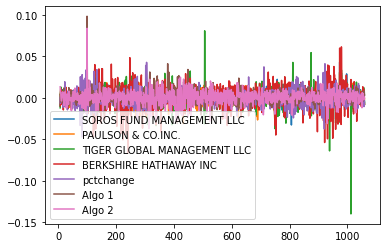

In [20]:
# Plot daily returns of all portfolios
returns_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:>

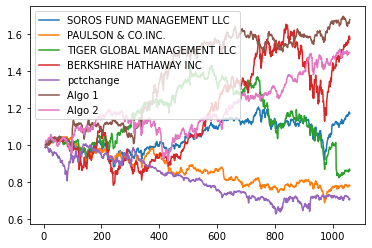

In [21]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + returns_df).cumprod()

cumulative_returns

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

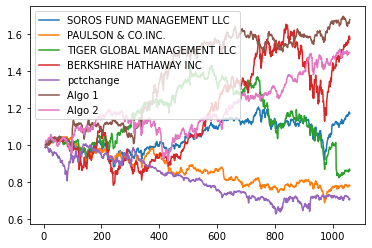

In [22]:
# Box plot to visually show risk

cumulative_returns.plot()

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
returns_df.std()

SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
pctchange                      0.008553
Algo 1                         0.007745
Algo 2                         0.008265
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate the daily standard deviation of S&P 500

sp500_history.std()


# Determine which portfolios are riskier than the S&P 500
print(sp500_history.std())
print(algo_returns.std())
print(whale_data.std())

pctchange    0.008135
dtype: float64
Algo 1    0.007988
Algo 2    0.008466
dtype: float64
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64


/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/3690898894.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sp500_history.std()
/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/3690898894.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sp500_history.std())
/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/3690898894.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(algo_returns.std())
/var/folders/jl/7bykfdr560q50k3f7sc9

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)

returns_df.std()*252

SOROS FUND MANAGEMENT LLC      1.979543
PAULSON & CO.INC.              1.760903
TIGER GLOBAL MANAGEMENT LLC    2.732889
BERKSHIRE HATHAWAY INC         3.238301
pctchange                      2.155390
Algo 1                         1.951705
Algo 2                         2.082832
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

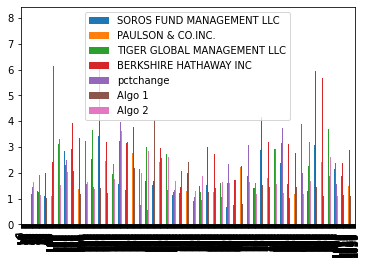

In [54]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_returns = returns_df.rolling(21).std()*252

# Plot the rolling standard deviation
rolling_returns.plot.bar()


### Calculate and plot the correlation

In [27]:
# Calculate the correlation
rolling_returns.corr()
# Display de correlation matrix
corrMatrix = rolling_returns.corr()
print(corrMatrix)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.661895   
PAULSON & CO.INC.                             0.661895            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.451378            0.405457   
BERKSHIRE HATHAWAY INC                        0.858086            0.625558   
pctchange                                     0.202010           -0.047461   
Algo 1                                       -0.086910            0.116802   
Algo 2                                        0.059820            0.231186   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.451378   
PAULSON & CO.INC.                               0.405457   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.411618   
pctchange                                       0.043664   
Algo 1         

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/2585609800.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  realsp500.var()
/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/2585609800.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  beta = realsp500.var() / returns_df.cov()


<AxesSubplot:>

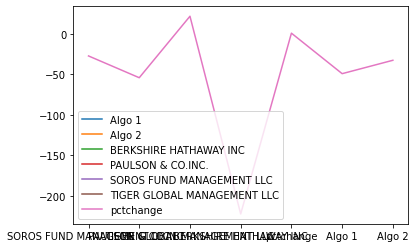

In [104]:
# Calculate convariance of a single portfolio
returns_df.cov()

# Calculate variance of S&P 500
realsp500.var()

# Computing beta
beta = realsp500.var() / returns_df.cov()
beta

# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [32]:
# Use `ewm` to calculate the rolling window

datetimesindex = sp500_history['Date']
returns_df = returns_df.ewm(halflife='21 days',times=datetimesindex).std()

ValueError: times must be datetime64[ns] dtype.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
sharp_ratio = returns_df.mean() / returns_df.std()

<AxesSubplot:>

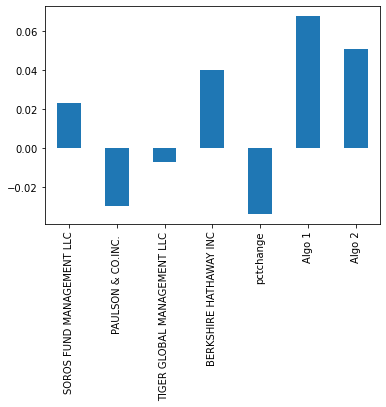

In [35]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Both Algo Strategies outperform the S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [70]:
# Reading data from 1st stock
csvpath = Path("../Presentations/AAPL - Sheet1.csv")
aapl_csv = pd.read_csv(csvpath)
aapl_csv = aapl_csv.assign(AAPL="AAPL")


In [71]:
# Reading data from 2nd stock
csvpath = Path("../Presentations/Goog - Sheet1.csv")
goog_csv = pd.read_csv(csvpath)
goog_csv = goog_csv.assign(GOOG="GOOG")

In [72]:
# Reading data from 3rd stock
csvpath = Path("../Presentations/TSLA - Sheet1.csv")
tsla_csv = pd.read_csv(csvpath)
tsla_csv = tsla_csv.assign(TSLA="TSLA")

In [73]:
# Combine all stocks in a single DataFrame
stock_csv = pd.concat([aapl_csv, tsla_csv, goog_csv], axis="columns", join="inner" )
stock_csv

,Date,Close,AAPL,Date,Close,TSLA,Date,Close,GOOG
0,1/4/2021 16:00:00,129.41,AAPL,1/4/2021 16:00:00,729.77,TSLA,1/4/2021 16:00:00,1728.24,GOOG
1,1/5/2021 16:00:00,131.01,AAPL,1/5/2021 16:00:00,735.11,TSLA,1/5/2021 16:00:00,1740.92,GOOG
2,1/6/2021 16:00:00,126.60,AAPL,1/6/2021 16:00:00,755.98,TSLA,1/6/2021 16:00:00,1735.29,GOOG
3,1/7/2021 16:00:00,130.92,AAPL,1/7/2021 16:00:00,816.04,TSLA,1/7/2021 16:00:00,1787.25,GOOG
4,1/8/2021 16:00:00,132.05,AAPL,1/8/2021 16:00:00,880.02,TSLA,1/8/2021 16:00:00,1807.21,GOOG
...,...,...,...,...,...,...,...,...,...
316,4/5/2022 16:00:00,175.06,AAPL,4/5/2022 16:00:00,1091.26,TSLA,4/5/2022 16:00:00,2821.26,GOOG
317,4/6/2022 16:00:00,171.83,AAPL,4/6/2022 16:00:00,1045.76,TSLA,4/6/2022 16:00:00,2743.52,GOOG
318,4/7/2022 16:00:00,172.14,AAPL,4/7/2022 16:00:00,1057.26,TSLA,4/7/2022 16:00:00,2729.30,GOOG
319,4/8/2022 16:00:00,170.09,AAPL,4/8/2022 16:00:00,1025.49,TSLA,4/8/2022 16:00:00,2680.21,GOOG


In [74]:
# Reset Date index
stock_csv.sort_index(inplace=True)

In [75]:
# Reorganize portfolio data by having a column per symbol
stock_csv

,Date,Close,AAPL,Date,Close,TSLA,Date,Close,GOOG
0,1/4/2021 16:00:00,129.41,AAPL,1/4/2021 16:00:00,729.77,TSLA,1/4/2021 16:00:00,1728.24,GOOG
1,1/5/2021 16:00:00,131.01,AAPL,1/5/2021 16:00:00,735.11,TSLA,1/5/2021 16:00:00,1740.92,GOOG
2,1/6/2021 16:00:00,126.60,AAPL,1/6/2021 16:00:00,755.98,TSLA,1/6/2021 16:00:00,1735.29,GOOG
3,1/7/2021 16:00:00,130.92,AAPL,1/7/2021 16:00:00,816.04,TSLA,1/7/2021 16:00:00,1787.25,GOOG
4,1/8/2021 16:00:00,132.05,AAPL,1/8/2021 16:00:00,880.02,TSLA,1/8/2021 16:00:00,1807.21,GOOG
...,...,...,...,...,...,...,...,...,...
316,4/5/2022 16:00:00,175.06,AAPL,4/5/2022 16:00:00,1091.26,TSLA,4/5/2022 16:00:00,2821.26,GOOG
317,4/6/2022 16:00:00,171.83,AAPL,4/6/2022 16:00:00,1045.76,TSLA,4/6/2022 16:00:00,2743.52,GOOG
318,4/7/2022 16:00:00,172.14,AAPL,4/7/2022 16:00:00,1057.26,TSLA,4/7/2022 16:00:00,2729.30,GOOG
319,4/8/2022 16:00:00,170.09,AAPL,4/8/2022 16:00:00,1025.49,TSLA,4/8/2022 16:00:00,2680.21,GOOG


In [76]:
# Calculate daily returns
stock_csv['Close'].pct_change()
# Drop NAs
stock_csv['Close'].dropna()
# Display sample data
stock_daily_returns = stock_csv['Close'].pct_change()
stock_daily_returns.dropna()


,Close,Close,Close
1,0.012364,0.007317,0.007337
2,-0.033662,0.028390,-0.003234
3,0.034123,0.079447,0.029943
4,0.008631,0.078403,0.011168
5,-0.023249,-0.078214,-0.022405
...,...,...,...
316,-0.018942,-0.047309,-0.017958
317,-0.018451,-0.041695,-0.027555
318,0.001804,0.010997,-0.005183
319,-0.011909,-0.030049,-0.017986


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [77]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_daily_returns = stock_daily_returns.dot(weights)
# Display sample data
stock_daily_returns

0           NaN
1      0.009006
2     -0.002835
3      0.047838
4      0.032734
         ...   
316   -0.028070
317   -0.029234
318    0.002539
319   -0.019982
320   -0.035096
Length: 321, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [78]:
# Join your returns DataFrame to the original returns DataFrame
stock_csv = pd.concat([stock_daily_returns, stock_csv],axis="columns", join="inner")

stock_csv

,0,Date,Close,AAPL,Date,Close,TSLA,Date,Close,GOOG
0,NaN,1/4/2021 16:00:00,129.41,AAPL,1/4/2021 16:00:00,729.77,TSLA,1/4/2021 16:00:00,1728.24,GOOG
1,0.009006,1/5/2021 16:00:00,131.01,AAPL,1/5/2021 16:00:00,735.11,TSLA,1/5/2021 16:00:00,1740.92,GOOG
2,-0.002835,1/6/2021 16:00:00,126.60,AAPL,1/6/2021 16:00:00,755.98,TSLA,1/6/2021 16:00:00,1735.29,GOOG
3,0.047838,1/7/2021 16:00:00,130.92,AAPL,1/7/2021 16:00:00,816.04,TSLA,1/7/2021 16:00:00,1787.25,GOOG
4,0.032734,1/8/2021 16:00:00,132.05,AAPL,1/8/2021 16:00:00,880.02,TSLA,1/8/2021 16:00:00,1807.21,GOOG
...,...,...,...,...,...,...,...,...,...,...
316,-0.028070,4/5/2022 16:00:00,175.06,AAPL,4/5/2022 16:00:00,1091.26,TSLA,4/5/2022 16:00:00,2821.26,GOOG
317,-0.029234,4/6/2022 16:00:00,171.83,AAPL,4/6/2022 16:00:00,1045.76,TSLA,4/6/2022 16:00:00,2743.52,GOOG
318,0.002539,4/7/2022 16:00:00,172.14,AAPL,4/7/2022 16:00:00,1057.26,TSLA,4/7/2022 16:00:00,2729.30,GOOG
319,-0.019982,4/8/2022 16:00:00,170.09,AAPL,4/8/2022 16:00:00,1025.49,TSLA,4/8/2022 16:00:00,2680.21,GOOG


In [79]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
stock_csv.dropna()

,0,Date,Close,AAPL,Date,Close,TSLA,Date,Close,GOOG
1,0.009006,1/5/2021 16:00:00,131.01,AAPL,1/5/2021 16:00:00,735.11,TSLA,1/5/2021 16:00:00,1740.92,GOOG
2,-0.002835,1/6/2021 16:00:00,126.60,AAPL,1/6/2021 16:00:00,755.98,TSLA,1/6/2021 16:00:00,1735.29,GOOG
3,0.047838,1/7/2021 16:00:00,130.92,AAPL,1/7/2021 16:00:00,816.04,TSLA,1/7/2021 16:00:00,1787.25,GOOG
4,0.032734,1/8/2021 16:00:00,132.05,AAPL,1/8/2021 16:00:00,880.02,TSLA,1/8/2021 16:00:00,1807.21,GOOG
5,-0.041289,1/11/2021 16:00:00,128.98,AAPL,1/11/2021 16:00:00,811.19,TSLA,1/11/2021 16:00:00,1766.72,GOOG
...,...,...,...,...,...,...,...,...,...,...
316,-0.028070,4/5/2022 16:00:00,175.06,AAPL,4/5/2022 16:00:00,1091.26,TSLA,4/5/2022 16:00:00,2821.26,GOOG
317,-0.029234,4/6/2022 16:00:00,171.83,AAPL,4/6/2022 16:00:00,1045.76,TSLA,4/6/2022 16:00:00,2743.52,GOOG
318,0.002539,4/7/2022 16:00:00,172.14,AAPL,4/7/2022 16:00:00,1057.26,TSLA,4/7/2022 16:00:00,2729.30,GOOG
319,-0.019982,4/8/2022 16:00:00,170.09,AAPL,4/8/2022 16:00:00,1025.49,TSLA,4/8/2022 16:00:00,2680.21,GOOG


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [80]:
# Calculate the annualized `std`
stock_csv['Close'].std()*252

Close     4419.391637
Close    41818.660970
Close    85664.716908
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [81]:
# Calculate rolling standard deviation

stock_csv['Close'].std()*252

# Plot rolling standard deviation
stock_csv['Close'] = stock_csv['Close'].rolling(21).std()*252
stock_csv["Close"].dropna()

,Close,Close,Close
20,1306.924796,11232.620807,18005.113157
21,1289.025354,9630.189919,21946.191561
22,1299.200320,7620.001283,24546.784557
23,1241.716689,5744.721496,27129.377664
24,1235.369416,5509.491240,29378.048868
...,...,...,...
316,2261.121797,31045.356421,26917.670840
317,2201.296220,30392.050001,24472.366815
318,2193.689359,30069.033706,24152.267581
319,2120.332388,29045.331879,23852.068900


### Calculate and plot the correlation

<AxesSubplot:>

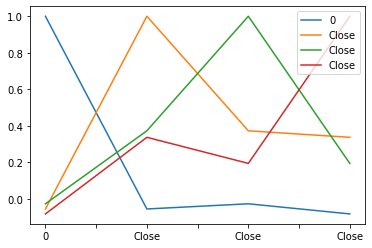

In [86]:
# Calculate and plot the correlation
stock_csv.corr().plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/3218258320.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Stock_csv_beta = stock_csv.var() / stock_csv.cov()


<AxesSubplot:xlabel='0'>

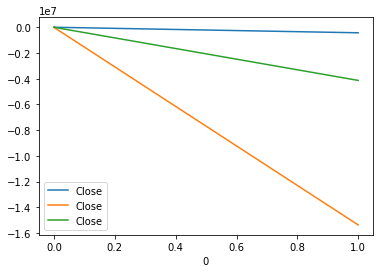

In [105]:
# Calculate and plot Beta
Stock_csv_beta = stock_csv.var() / stock_csv.cov()

Stock_csv_beta.set_index([0]).plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [109]:
# Calculate Annualized Sharpe Ratios
stock_sharpe = stock_csv.mean() / stock_csv.std() * 252

stock_sharpe

/var/folders/jl/7bykfdr560q50k3f7sc9xpfc0000gn/T/ipykernel_3144/1091760300.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stock_sharpe = stock_csv.mean() / stock_csv.std() * 252


0         16.943615
Close    594.405480
Close    400.777317
Close    663.878233
dtype: float64

<AxesSubplot:>

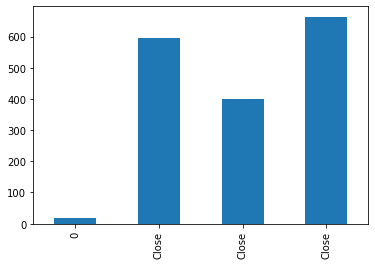

In [110]:
# Visualize the sharpe ratios as a bar plot

stock_sharpe.plot.bar()

### How does your portfolio do?

Write your answer here!

All 3 of the stocks used to build the portfolio have drastically out paced the SP500. 